In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn

  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 3.2 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 1.9 MB/s eta 0:00:00m eta 0:00:010:00:020m
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)


Columns in dataset: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
Statistics for petal_length:
Mean: 3.758666666666666
Median: 4.35
Mode: 1.5
Standard Deviation: 1.7644204199522617
Variance: 3.1131794183445156
Range: 5.9

Outliers: []



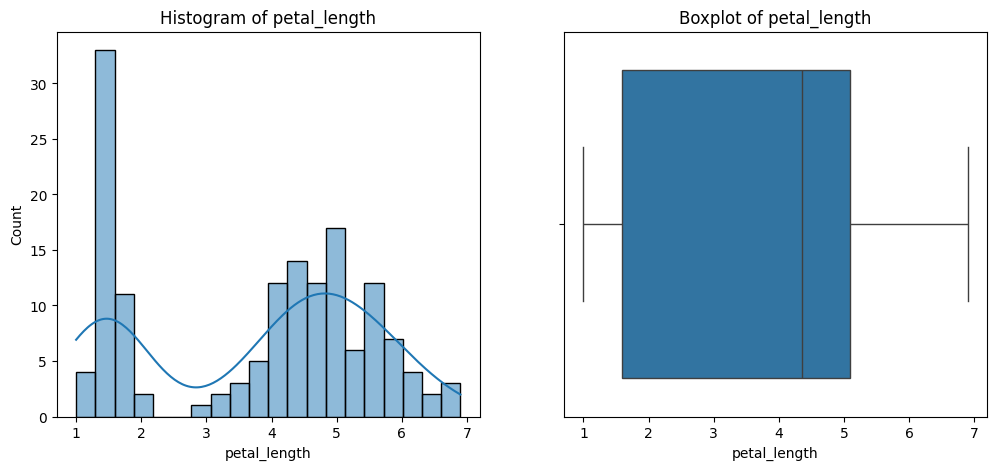

Frequency of categories in species:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64 



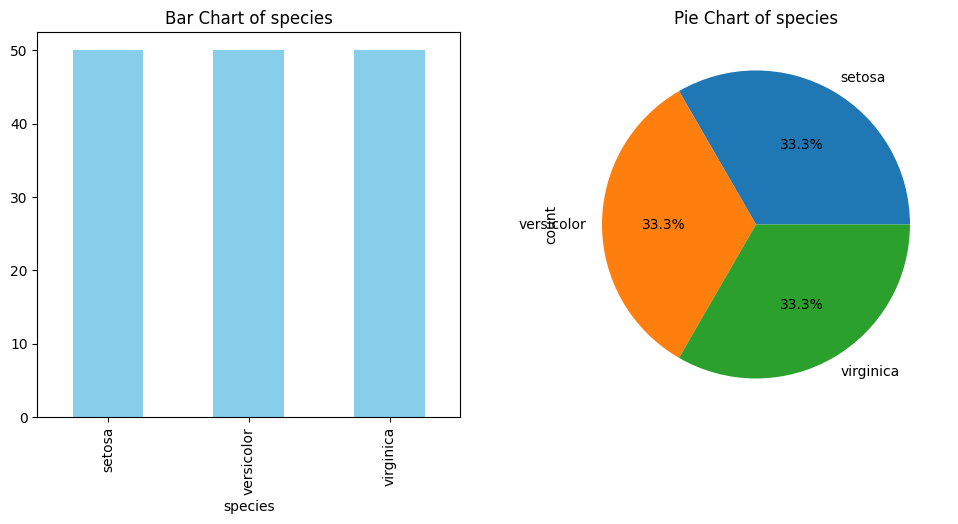

In [6]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
 
def load_dataset(file_path): 
    return pd.read_csv(file_path) 

def numerical_stats(df, column): 
    data = df[column].dropna() 
    mean = np.mean(data) 
    median = np.median(data) 
    mode = data.mode()[0] if not data.mode().empty else None 
    std_dev = np.std(data, ddof=1) 
    variance = np.var(data, ddof=1) 
    data_range = np.max(data) - np.min(data) 
    
    print(f"Statistics for {column}:") 
    print(f"Mean: {mean}") 
    print(f"Median: {median}") 
    print(f"Mode: {mode}") 
    print(f"Standard Deviation: {std_dev}") 
    print(f"Variance: {variance}") 
    print(f"Range: {data_range}\n") 
    
    return data 

def detect_outliers(data): 
    Q1 = np.percentile(data, 25) 
    Q3 = np.percentile(data, 75) 
    IQR = Q3 - Q1 
    lower_bound = Q1 - 1.5 * IQR 
    upper_bound = Q3 + 1.5 * IQR 
    outliers = data[(data < lower_bound) | (data > upper_bound)] 
    
    print(f"Outliers: {outliers.tolist()}\n") 

def plot_numerical_distribution(data, column): 
    plt.figure(figsize=(12, 5)) 
     
    plt.subplot(1, 2, 1) 
    sns.histplot(data, bins=20, kde=True) 
    plt.title(f'Histogram of {column}') 
     
    plt.subplot(1, 2, 2) 
    sns.boxplot(x=data) 
    plt.title(f'Boxplot of {column}') 
     
    plt.show() 

def categorical_frequency(df, column): 
    category_counts = df[column].value_counts() 
     
    print(f"Frequency of categories in {column}:") 
    print(category_counts, "\n") 
     
    return category_counts 

def plot_categorical_distribution(category_counts, column): 
    plt.figure(figsize=(12, 5)) 
     
    plt.subplot(1, 2, 1) 
    category_counts.plot(kind='bar', color='skyblue') 
    plt.title(f'Bar Chart of {column}') 
     
    plt.subplot(1, 2, 2) 
    category_counts.plot(kind='pie', autopct='%1.1f%%') 
    plt.title(f'Pie Chart of {column}') 
     
    plt.show() 

def main(): 
    file_path = 'Iris.csv'
    df = load_dataset(file_path)
     
    print("Columns in dataset:", df.columns.tolist()) 
     
    num_col = 'petal_length'
    num_data = numerical_stats(df, num_col) 
    detect_outliers(num_data) 
    plot_numerical_distribution(num_data, num_col) 
    
    cat_col = 'species'
    cat_counts = categorical_frequency(df, cat_col) 
    plot_categorical_distribution(cat_counts, cat_col) 


main()

Dataset Preview:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


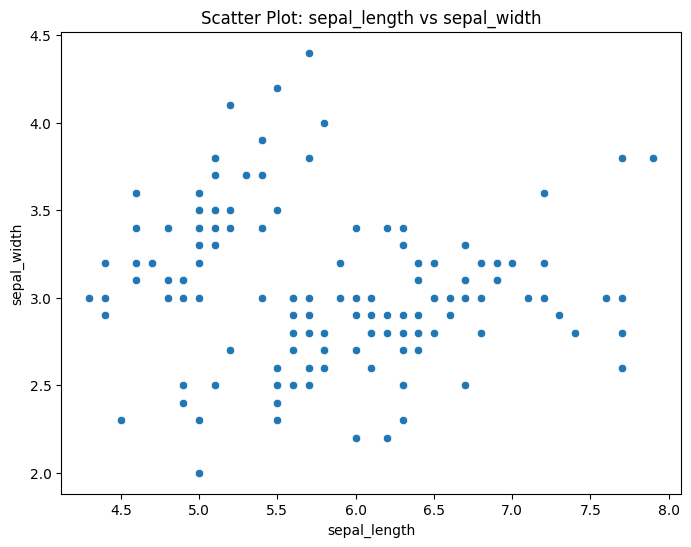


Pearson Correlation Coefficient between sepal_length and sepal_width: -0.10936924995064935

Covariance Matrix:
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      0.685694    -0.039268      1.273682     0.516904
sepal_width      -0.039268     0.188004     -0.321713    -0.117981
petal_length      1.273682    -0.321713      3.113179     1.296387
petal_width       0.516904    -0.117981      1.296387     0.582414

Correlation Matrix:
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000


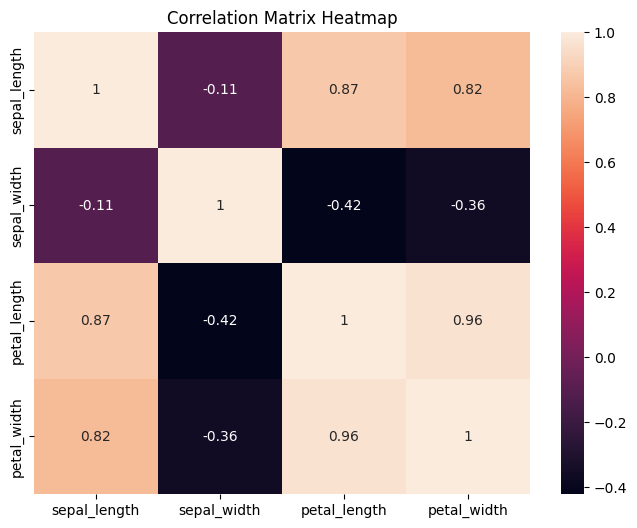

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # ✅ You must import seaborn to use sns

# Define column names (in case the file doesn't have proper headers)
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# Load the CSV file
df = pd.read_csv("Iris.csv", names=column_names, header=0)  # Set header=0 if the file has column names

# Display the first few rows
print("Dataset Preview:")
print(df.head())

# Select two numerical columns
x_column = df.columns[0]  # First numerical column (sepal_length)
y_column = df.columns[1]  # Second numerical column (sepal_width)

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df[x_column], y=df[y_column])
plt.title(f'Scatter Plot: {x_column} vs {y_column}')
plt.xlabel(x_column)
plt.ylabel(y_column)
# plt.grid(True)
plt.show()

# Calculate Pearson correlation coefficient
correlation = np.corrcoef(df[x_column], df[y_column])[0, 1]
print(f'\nPearson Correlation Coefficient between {x_column} and {y_column}: {correlation}')

# Keep only numeric columns
df_numeric = df.select_dtypes(include=[np.number])

# Compute and display covariance matrix
cov_matrix = df_numeric.cov()
print("\nCovariance Matrix:")
print(cov_matrix)

# Compute and display correlation matrix
corr_matrix = df_numeric.corr()
print("\nCorrelation Matrix:")
print(corr_matrix)

# Visualize correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix Heatmap')
plt.show()


[[-9.00681170e-01  1.03205722e+00 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00 -1.24957601e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.38535265e+00  3.37848329e-01 -1.39813811e+00 -1.31297673e+00]
 [-1.50652052e+00  1.06445364e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.02184904e+00  1.26346019e+00 -1.34127240e+00 -1.31297673e+00]
 [-5.37177559e-01  1.95766909e+00 -1.17067529e+00 -1.05003079e+00]
 [-1.50652052e+00  8.00654259e-01 -1.34127240e+00 -1.18150376e+00]
 [-1.02184904e+00  8.00654259e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.74885626e+00 -3.56360566e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00  1.06445364e-01 -1.28440670e+00 -1.44444970e+00]
 [-5.37177559e-01  1.49486315e+00 -1.28440670e+00 -1.31297673e+00]
 [-1.26418478e+00  8.00654259e-01 -1.22754100e+00 -1.31297673e+00]
 [-1.26418478e+00 -1.24957601e-01 -1.34127240e+00 -1.44444970e+00]
 [-1.87002413e+00 -1.24957601e-01 -1.51186952e+00 -1.44444970e+00]
 [-5.25060772e-02  2.18907205e+00 -1.45500381e+00 -1.31297673e

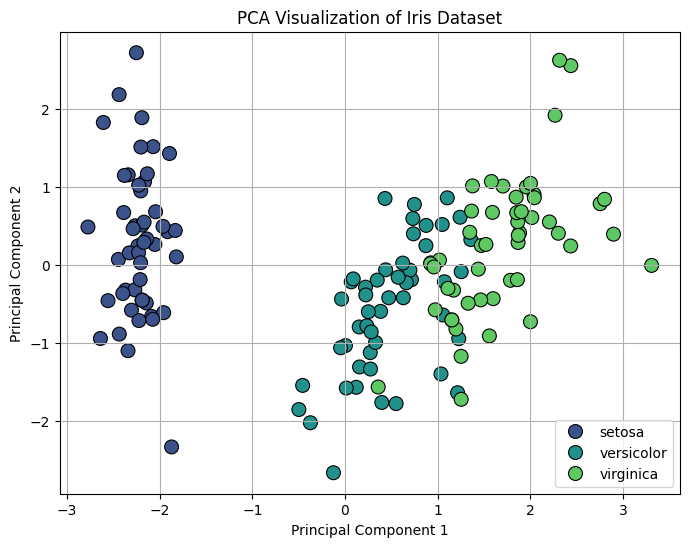

Explained Variance Ratio: [0.72770452 0.23030523]


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load dataset
df = pd.read_csv("Iris.csv")  # Ensure this file exists in your directory

# Drop unnecessary columns (like 'Id' if present)
if 'Id' in df.columns:
    df = df.drop(columns=['Id'])

# Separate features (X) and target variable (y)
X = df.drop(columns=['species'])  # Features
y = df['species']  # Target

# Standardize the dataset (mean = 0, std = 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)



# Apply PCA to reduce from 4D to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print(X_pca)

# Convert PCA results to a DataFrame
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Species'] = y  # Add species back for labeling

# Visualize PCA results
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Species', palette='viridis', s=100, edgecolor='k')
plt.title("PCA Visualization of Iris Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.show()

# Print explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score

# Load the Iris dataset
df = pd.read_csv('Iris.csv')  # Make sure this file exists in the same directory

# If 'Id' column exists, drop it
if 'Id' in df.columns:
    df = df.drop(columns=['Id'])

# Separate features and target variable
X = df.iloc[:, :-1].values  # All columns except last
y = df.iloc[:, -1].values   # Last column (Species)

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Function to evaluate k-NN for different k values
def evaluate_knn(k_values, weighted=False):
    results = []
    for k in k_values:
        if weighted:
            model = KNeighborsClassifier(n_neighbors=k, weights='distance')  # Weighted k-NN
        else:
            model = KNeighborsClassifier(n_neighbors=k, weights='uniform')   # Regular k-NN

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Compute accuracy and F1-score
        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')

        results.append((k, acc, f1))

    return pd.DataFrame(results, columns=['k', 'Accuracy', 'F1-score'])

# Test with k = 1, 3, 5
k_values = [1, 3, 5]
regular_knn_results = evaluate_knn(k_values, weighted=False)
weighted_knn_results = evaluate_knn(k_values, weighted=True)

# Display results
print("Regular k-NN Results:")
print(regular_knn_results)

print("\nWeighted k-NN Results:")
print(weighted_knn_results)
 

Regular k-NN Results:
   k  Accuracy  F1-score
0  1  0.966667  0.966583
1  3  0.933333  0.932660
2  5  0.933333  0.932660

Weighted k-NN Results:
   k  Accuracy  F1-score
0  1  0.966667  0.966583
1  3  0.966667  0.966583
2  5  0.966667  0.966583


In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Step 1: Generate synthetic dataset
np.random.seed(42)
X = np.linspace(-3, 3, 100)
# print(X)
y = np.sin(2 * X) + np.random.normal(0, 0.1, size=X.shape)
X = X.reshape(-1, 1)

# Step 2: Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Locally Weighted Regression Function
def locally_weighted_regression(x_query, X_train, y_train, tau):
    """
    Perform Locally Weighted Regression at a given query point.
    :param x_query: The query point (scalar)
    :param X_train: Training data (N x 1)
    :param y_train: Target values (N,)
    :param tau: Bandwidth parameter (smoothness)
    :return: Predicted value at x_query
    """
    # Add bias term to X
    X_bias = np.hstack((np.ones_like(X_train), X_train))  # Shape: (N, 2)
    
    # Augmented query point [1, x]
    x_query = np.array([1, x_query])  # Shape: (2,)
    
    # Compute weights using Gaussian kernel
    weights = np.exp(-np.square(X_train - x_query[1]) / (2 * tau ** 2))  # Shape: (N, 1)
    W = np.diag(weights.flatten())  # Shape: (N, N)
    
    # Compute theta using weighted normal equation
    theta = np.linalg.pinv(X_bias @ W @ X_bias) @ (X_bias.T @ W @ y_train)  # Shape: (2,)
    
    # Predict the output
    print(theta)
    return x_query @ theta  # Scalar

# Step 4: Predict for all test points (sorted)
tau = 0.5  # Bandwidth for smoothness
X_test_sorted = np.sort(X_test, axis=0)
y_pred = np.array([locally_weighted_regression(x[0], X_train, y_train, tau) for x in X_test_sorted])

# Step 5: Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, label='Training Data', color='blue', alpha=0.6)
plt.plot(X_test_sorted, y_pred, label=f'LWR Prediction (tau={tau})', color='red', linewidth=2)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Locally Weighted Regression')
plt.legend()
plt.grid(True)
plt.show()


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 80 is different from 2)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]], shape=(20640, 8)), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset

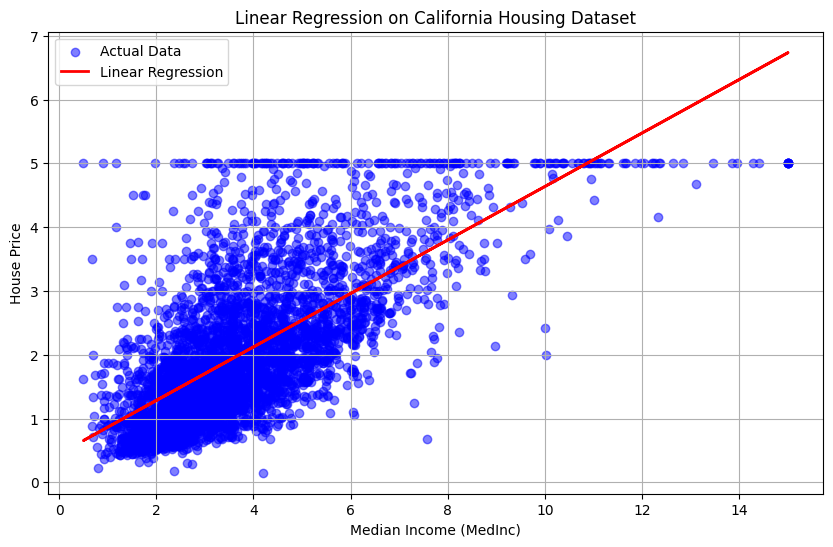

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing

# Step 1: Load the California Housing dataset
housing = fetch_california_housing()
print(housing)
X_housing = pd.DataFrame(housing.data, columns=housing.feature_names)
y_housing = housing.target

print(X_housing.head())
# Step 2: Select 'MedInc' (Median Income) as the only feature
X = X_housing[['MedInc']]
y = y_housing

# Step 3: Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 4: Train a Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Step 5: Predict house prices on test data
y_pred = lin_reg.predict(X_test)

# Step 6: Visualization
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color="blue", label="Actual Data", alpha=0.5)
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Linear Regression")
plt.xlabel("Median Income (MedInc)")
plt.ylabel("House Price")
plt.title("Linear Regression on California Housing Dataset")
plt.legend()
plt.grid(True)
plt.show()


    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino  


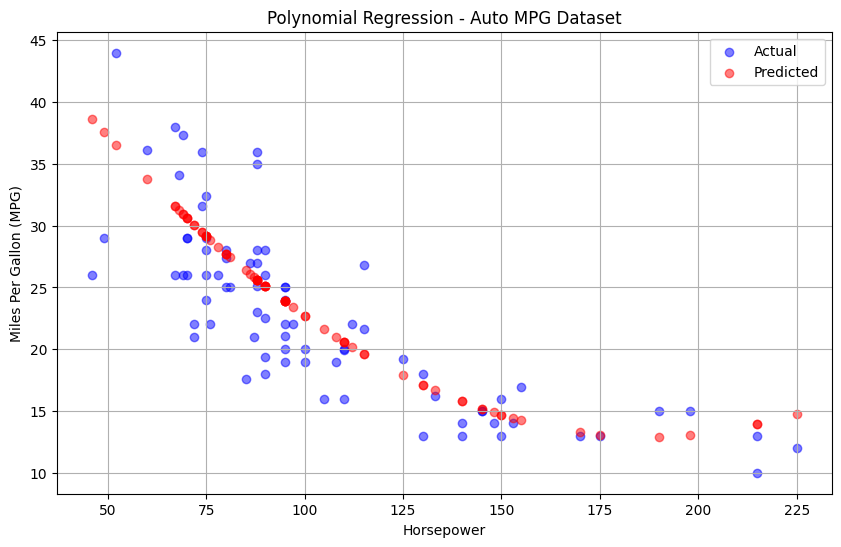

Mean Squared Error: 18.42


In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Step 1: Load dataset
auto_mpg = pd.read_csv("mpg.csv")  # Ensure 'mpg.csv' is in your working directory

# Step 2: Data Cleaning
auto_mpg.dropna(inplace=True)  # Drop rows with missing values
print(auto_mpg.head())
auto_mpg = auto_mpg[auto_mpg['horsepower'] != '?']  # Remove '?' entries
auto_mpg['horsepower'] = auto_mpg['horsepower'].astype(float)  # Convert to float

# Step 3: Feature selection
X_auto = auto_mpg[['horsepower']]  # Input feature
y_auto = auto_mpg['mpg']           # Target variable


# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_auto, y_auto, test_size=0.2, random_state=42
)

# Step 5: Polynomial feature transformation (degree 2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Step 6: Train the model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Step 7: Make predictions
y_pred = model.predict(X_test_poly)

# Step 8: Visualization
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color="blue", label="Actual", alpha=0.5)
plt.scatter(X_test, y_pred, color="red", label="Predicted", alpha=0.5)
plt.xlabel("Horsepower")
plt.ylabel("Miles Per Gallon (MPG)")
plt.title("Polynomial Regression - Auto MPG Dataset")
plt.legend()
plt.grid(True)
plt.show()

# Step 9: Print evaluation metric
mse = mean_squared_error( y_pred,y_test)
print(f"Mean Squared Error: {mse:.2f}")


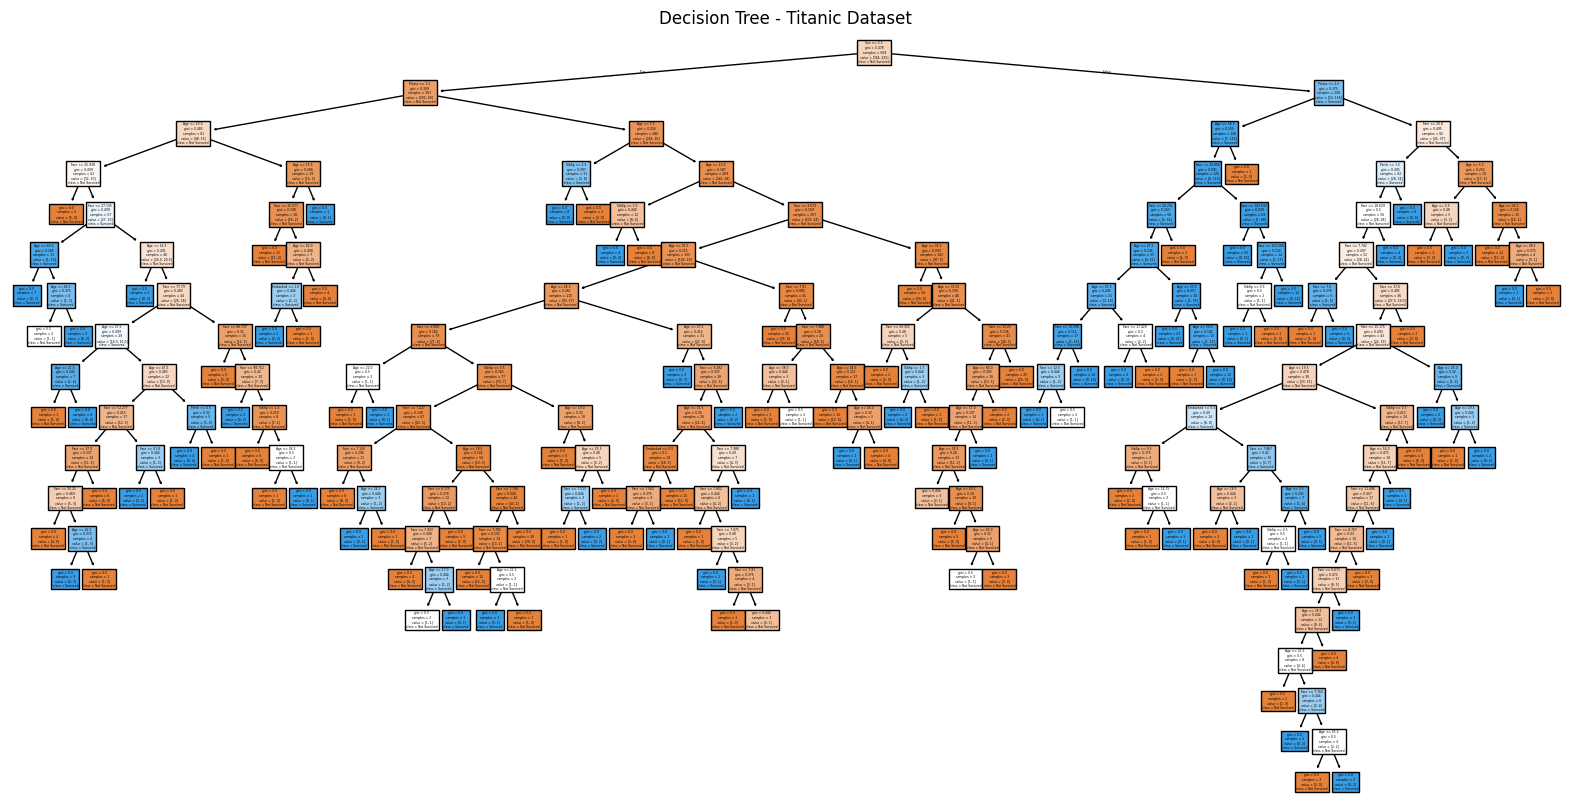

Evaluation Metrics:
Accuracy  : 0.6993
Precision : 0.6852
Recall    : 0.5873
F1 Score  : 0.6325

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.79      0.75        80
           1       0.69      0.59      0.63        63

    accuracy                           0.70       143
   macro avg       0.70      0.69      0.69       143
weighted avg       0.70      0.70      0.70       143



In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Step 1: Load the Titanic dataset
df = pd.read_csv("titanic.csv")  # Make sure 'titanic.csv' is in the same directory

# Step 2: Preprocess the data
# Select only relevant columns
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

# Drop rows with missing values
df.dropna(inplace=True)

# Convert categorical variables to numeric
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Step 3: Split into features and target
X = df.drop('Survived', axis=1)
y = df['Survived']

# Split into training and testing sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the Decision Tree model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Step 5: Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Not Survived', 'Survived'])
plt.title("Decision Tree - Titanic Dataset")
plt.show()

# Step 6: Predict and evaluate the model
y_pred = clf.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Step 7: Print evaluation results
print("Evaluation Metrics:")
print(f"Accuracy  : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1 Score  : {f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Step 2: Load the dataset from CSV
df = pd.read_csv("Iris.csv") # Make sure 'iris.csv' is in your Jupyter working directory

# Step 3: Preprocess (split into features and target)
X = df.drop("species", axis=1) # Features
y = df["species"] # Target labels

# Step 4: Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Create and train Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Step 6: Predict and evaluate
y_pred = model.predict(X_test)

# Step 7: Display results
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



   mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   diagnosis  
0          0  
1          0  
2          0  
3          0  
4          0  
   mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness
0        17.99         10.38          122.80     1001.0          0.11840
1        20.57         17.77          132.90     1326.0          0.08474
2        19.69         21.25          130.00     1203.0          0.10960
3        11.42         20.38           77.58      386.1          0.14250
4        20.29         14.34          135.10     1297.0          0.10030
   mean_radius 

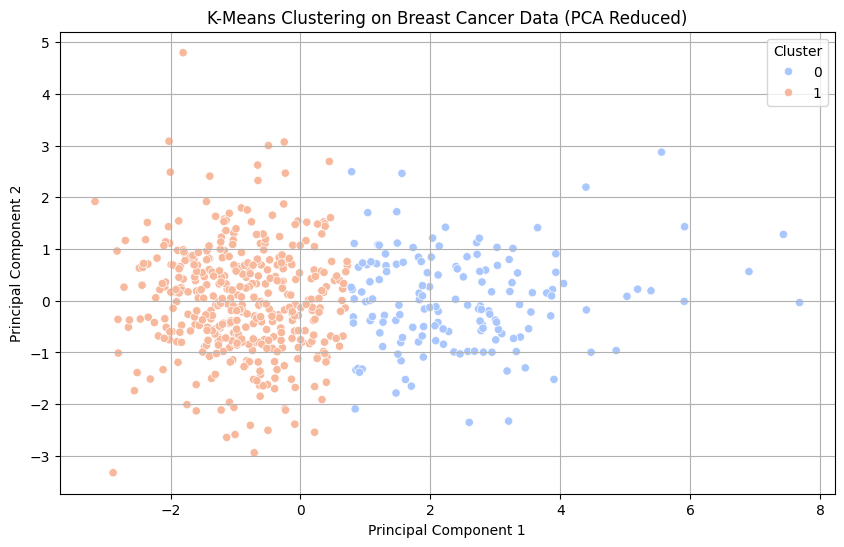

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Step 1: Load the Wisconsin Breast Cancer Dataset from Desktop
# Modify the path if you're on Linux or macOS
df = pd.read_csv('Breast_cancer_data.csv')

# If the dataset doesn't have column headers, you can add them like this:
# column_names = ['id', 'diagnosis', 'mean_radius', 'mean_texture', ..., 'worst_fractal_dimension']
# df = pd.read_csv(r'C:\Users\YourUsername\Desktop\breast_cancer_data.csv', header=None, names=column_names)

# Drop unwanted columns like ID if present
if 'id' in df.columns:
    df = df.drop(['id'], axis=1)

# Convert diagnosis (M/B) to numeric for clustering
# if 'diagnosis' in df.columns:
#     df['diagnosis'] = df['diagnosis'].map({'M': 0, 'B': 1})
print(df.head())
# Step 2: Standardize the features
features = df.drop('diagnosis', axis=1)
print(features.head())
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 3: Apply K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Step 4: Add cluster labels
df['Cluster'] = clusters

print(df.head())

# Step 5: Reduce dimensionality using PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)
print(pca_components)

df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]

# Step 6: Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df,x='PCA1', y='PCA2', hue='Cluster', palette='coolwarm')
plt.title('K-Means Clustering on Breast Cancer Data (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()
